In [2]:
## imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary config/cache directory at /var/folders/8_/293n4n_n7kx7d2svh9g222640000gn/T/matplotlib-wgx7rxh6 because the default path (/Users/aaronaguerrevere/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:xlabel='Date/Time'>

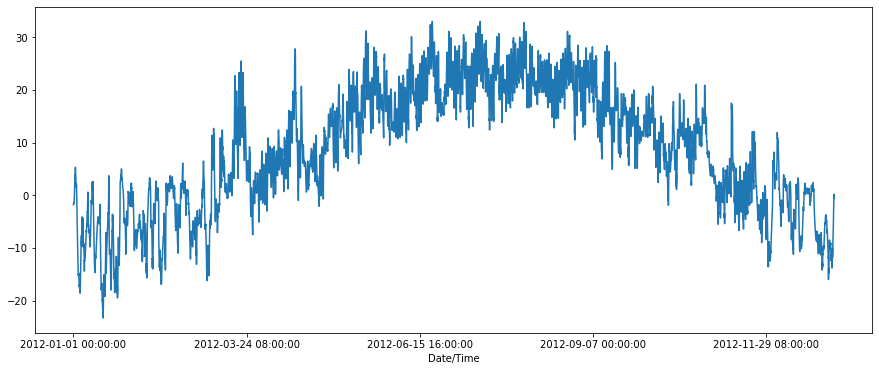

In [8]:
weather_2012_final = pd.read_csv('weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

In [3]:
# set a template for url with {year} & {month}
# as part of url since they'll change
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

# # use python's .format to populate editable 
# # elements in url template
url = url_template.format(month=3, year=2012)


# use read_csv to acces data from url
weather_mar2012 = pd.read_csv(url, index_col='Date/Time (LST)', parse_dates=True)

weather_mar2012.tail()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-03-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,19:00,5.9,NaN,...,NaN,25.0,NaN,100.88,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,20:00,4.4,NaN,...,NaN,25.0,NaN,100.85,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,21:00,2.6,NaN,...,NaN,25.0,NaN,100.86,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 22:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,22:00,2.7,NaN,...,NaN,25.0,NaN,100.82,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 23:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,23:00,1.5,NaN,...,NaN,25.0,NaN,100.79,NaN,NaN,NaN,NaN,NaN,Clear


<AxesSubplot:xlabel='Date/Time (LST)'>

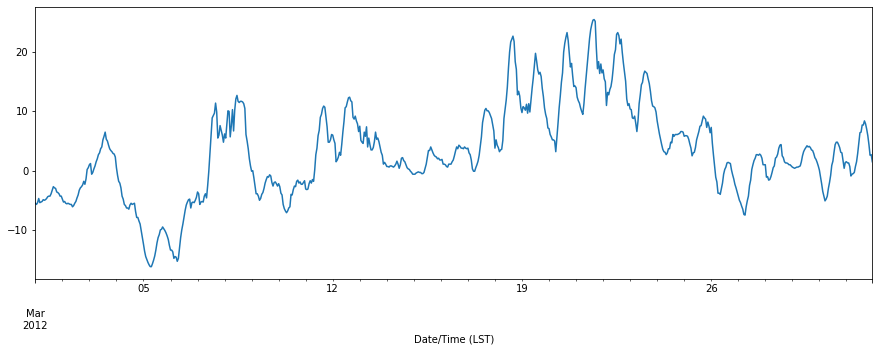

In [5]:
weather_mar2012[u"Temp (°C)"].plot(figsize=(15, 5))

In [7]:
temperatures = weather_mar2012[[u'Temp (°C)']].copy()
temperatures.head

<bound method NDFrame.head of                      Temp (°C)
Date/Time (LST)               
2012-03-01 00:00:00       -5.5
2012-03-01 01:00:00       -5.7
2012-03-01 02:00:00       -5.4
2012-03-01 03:00:00       -4.7
2012-03-01 04:00:00       -5.4
...                        ...
2012-03-31 19:00:00        5.9
2012-03-31 20:00:00        4.4
2012-03-31 21:00:00        2.6
2012-03-31 22:00:00        2.7
2012-03-31 23:00:00        1.5

[744 rows x 1 columns]>

<AxesSubplot:xlabel='Hour'>

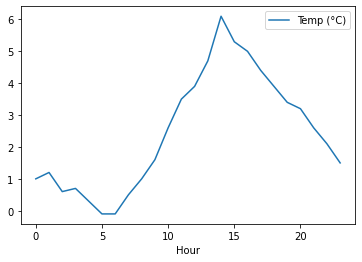

In [9]:
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()